In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# local에서 실행할 때 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
import matplotlib.pyplot as plt

# colab에서 실행할 때 한글 폰트 사용을 위해서 세팅
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# import matplotlib.pyplot as plt
# plt.rc('font', family='NanumBarunGothic') 

# 0. data load

## 1. 독거 노인이 아닌 사람들

In [2]:
all_not_elder = pd.read_csv("./data/지역별 독거노인이 아닌사람들.csv",index_col=0)
all_not_elder.head()

,ID,ID_fam,year,region,town_t,sex,age,incm,ho_incm,incm5,...,고콜레스테롤혈증,고중성지방혈증,B형간염,빈혈,뇌졸중,협심증또는심근경색증,천식,아토피피부염,골관절염,우울증
0,b'A308780901',b'A3087809',2010.0,1.0,1.0,1.0,74.0,3.0,2.0,4.0,...,0.0,1.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0
1,b'A309099802',b'A3090998',2010.0,1.0,1.0,2.0,71.0,2.0,1.0,2.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,b'A309460901',b'A3094609',2010.0,1.0,1.0,2.0,61.0,3.0,2.0,4.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0
3,b'A309460902',b'A3094609',2010.0,1.0,1.0,1.0,32.0,2.0,2.0,2.0,...,0.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
5,b'A310980901',b'A3109809',2010.0,1.0,1.0,1.0,80.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0


In [3]:
diseasename = list(all_not_elder.iloc[:,-13:].columns)

## 2. 전체 독거노인, 지역별 독거노인

In [4]:
years = [int("20" + str(x)) for x in range(10,22)]

In [5]:
all_al_edler = pd.read_csv("./data/전체독거노인.csv",index_col=0)
all_al_edler

,ID,ID_fam,year,region,town_t,sex,age,incm,ho_incm,incm5,...,고콜레스테롤혈증,고중성지방혈증,B형간염,빈혈,뇌졸중,협심증또는심근경색증,천식,아토피피부염,골관절염,우울증
33,b'A326339801',b'A3263398',2010.0,1.0,1.0,2.0,74.0,3.0,1.0,3.0,...,0.0,0.0,0.0,0.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0
56,b'A338719801',b'A3387198',2010.0,1.0,1.0,2.0,75.0,2.0,1.0,3.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
75,b'B309840901',b'B3098409',2010.0,2.0,1.0,2.0,65.0,2.0,1.0,2.0,...,0.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
76,b'B310600901',b'B3106009',2010.0,2.0,1.0,2.0,79.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
80,b'B311840901',b'B3118409',2010.0,2.0,1.0,2.0,75.0,3.0,2.0,3.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35560,b'R901174501',b'R9011745',2021.0,8.0,2.0,2.0,80.0,3.0,2.0,4.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
35564,b'R901196601',b'R9011966',2021.0,8.0,2.0,2.0,80.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35571,b'R901558701',b'R9015587',2021.0,8.0,2.0,1.0,74.0,3.0,2.0,4.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35605,b'R903341101',b'R9033411',2021.0,8.0,2.0,1.0,71.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [6]:
meta = pd.read_excel("./data/modified_meta_data20.xlsx")
dict_region={}

for row in meta["option description"][3].split('|')[:-1]:
    dict_region[row.split(':')[1].strip()] = int(row.split(':')[0])
dict_region
for regi in list(dict_region.keys()):
    globals()["data_{}".format(regi)] = all_al_edler[all_al_edler["region"] == dict_region[regi]]

In [7]:
dict_region

{'서울': 1,
 '부산': 2,
 '대구': 3,
 '인천': 4,
 '광주': 5,
 '대전': 6,
 '울산': 7,
 '세종': 8,
 '경기': 9,
 '강원': 10,
 '충북': 11,
 '충남': 12,
 '전북': 13,
 '전남': 14,
 '경북': 15,
 '경남': 16,
 '제주': 17}

In [8]:
def sumdata(x):
    disease = []
    x = x.iloc[:,-13:]
    diseasename = list(x.columns)
    for i in x.columns:
        if 1 in x[i].value_counts().index:
            if len(x[i].value_counts()) == 3:
                disease.append(x[i].value_counts().values[2])
            else: disease.append(x[i].value_counts()[1])
        else: disease.append(0)
    df_disease = pd.DataFrame(np.array(disease).reshape(-1,13))
    df_disease.columns = diseasename
    return df_disease

# 1. 질병분석

In [9]:
sum_al_elder=sumdata(all_al_edler)
sum_강원_elder=sumdata(data_강원)
sum_경기_elder=sumdata(data_경기)
sum_경남_elder=sumdata(data_경남)
sum_경북_elder=sumdata(data_경북)
sum_광주_elder=sumdata(data_광주)
sum_대구_elder=sumdata(data_대구)
sum_대전_elder=sumdata(data_대전)
sum_부산_elder=sumdata(data_부산)
sum_서울_elder=sumdata(data_서울)
sum_세종_elder=sumdata(data_세종)
sum_울산_elder=sumdata(data_울산)
sum_인천_elder=sumdata(data_인천)
sum_전남_elder=sumdata(data_전남)
sum_전북_elder=sumdata(data_전북)
sum_충남_elder=sumdata(data_충남)
sum_충북_elder=sumdata(data_충북)
sum_제주_elder=sumdata(data_제주)

df_sum=pd.concat([sum_al_elder,sum_강원_elder,sum_경기_elder,sum_경남_elder,sum_경북_elder,sum_광주_elder,
sum_대구_elder,sum_대전_elder,sum_부산_elder,sum_서울_elder,sum_세종_elder,sum_울산_elder,
sum_인천_elder,sum_전남_elder, sum_전북_elder, sum_충남_elder, sum_충북_elder,sum_제주_elder])
df_sum.index = ["전국", "강원", "경기", "경남", "경북", "광주", "대구", "대전", "부산", "서울", "세종", "울산",
                "인천", "전남", "전북", "충남", "충북", "제주"]


In [10]:
lst_pop = [sum(all_al_edler.groupby("region").count()["ID"].values)]+[len(data_강원),
len(data_경기),
len(data_경남),
len(data_경북),
len(data_광주),
len(data_대구),
len(data_대전),
len(data_부산),
len(data_서울),
len(data_세종),
len(data_울산),
len(data_인천),
len(data_전남),
len(data_전북),
len(data_충남),
len(data_충북),
len(data_제주)]

In [11]:
df_sum

,비만,고혈압,당뇨병,고콜레스테롤혈증,고중성지방혈증,B형간염,빈혈,뇌졸중,협심증또는심근경색증,천식,아토피피부염,골관절염,우울증
전국,979,1641,759,860,304,64,390,157,198,142,39,238,193
강원,54,80,36,34,16,3,13,7,9,7,4,8,10
경기,128,214,118,147,41,9,45,17,24,16,5,12,20
경남,64,97,40,46,12,7,27,13,13,8,0,9,8
경북,70,149,63,71,22,6,33,11,17,7,3,22,12
광주,38,47,30,25,13,1,15,4,9,7,2,12,6
대구,42,60,25,32,8,1,14,2,5,2,2,10,8
대전,18,38,18,23,7,0,9,6,6,4,1,3,5
부산,83,134,75,76,28,11,39,15,21,13,2,11,20
서울,125,211,86,129,38,7,38,20,26,17,8,22,26


In [12]:
lst_pop

[2483,
 115,
 328,
 154,
 209,
 78,
 93,
 56,
 212,
 323,
 189,
 41,
 105,
 172,
 144,
 127,
 101,
 36]

In [13]:
sum_every_elder_ratio = (df_sum.T/lst_pop).T
sum_every_elder_ratio

,비만,고혈압,당뇨병,고콜레스테롤혈증,고중성지방혈증,B형간염,빈혈,뇌졸중,협심증또는심근경색증,천식,아토피피부염,골관절염,우울증
전국,0.394281,0.660894,0.305679,0.346355,0.122433,0.025775,0.157068,0.063230,0.079742,0.057189,0.015707,0.095852,0.077729
강원,0.469565,0.695652,0.313043,0.295652,0.139130,0.026087,0.113043,0.060870,0.078261,0.060870,0.034783,0.069565,0.086957
경기,0.390244,0.652439,0.359756,0.448171,0.125000,0.027439,0.137195,0.051829,0.073171,0.048780,0.015244,0.036585,0.060976
경남,0.415584,0.629870,0.259740,0.298701,0.077922,0.045455,0.175325,0.084416,0.084416,0.051948,0.000000,0.058442,0.051948
경북,0.334928,0.712919,0.301435,0.339713,0.105263,0.028708,0.157895,0.052632,0.081340,0.033493,0.014354,0.105263,0.057416
광주,0.487179,0.602564,0.384615,0.320513,0.166667,0.012821,0.192308,0.051282,0.115385,0.089744,0.025641,0.153846,0.076923
대구,0.451613,0.645161,0.268817,0.344086,0.086022,0.010753,0.150538,0.021505,0.053763,0.021505,0.021505,0.107527,0.086022
대전,0.321429,0.678571,0.321429,0.410714,0.125000,0.000000,0.160714,0.107143,0.107143,0.071429,0.017857,0.053571,0.089286
부산,0.391509,0.632075,0.353774,0.358491,0.132075,0.051887,0.183962,0.070755,0.099057,0.061321,0.009434,0.051887,0.094340
서울,0.386997,0.653251,0.266254,0.399381,0.117647,0.021672,0.117647,0.061920,0.080495,0.052632,0.024768,0.068111,0.080495


In [14]:
sum_al = sumdata(all_not_elder)
sum_al_ratio = sum_al/len(all_not_elder)
sum_al_ratio.index = ["비고령"]
sum_al_ratio

,비만,고혈압,당뇨병,고콜레스테롤혈증,고중성지방혈증,B형간염,빈혈,뇌졸중,협심증또는심근경색증,천식,아토피피부염,골관절염,우울증
비고령,0.348043,0.347692,0.158004,0.227338,0.149517,0.033726,0.093041,0.023547,0.032226,0.029386,0.016655,0.129128,0.045978


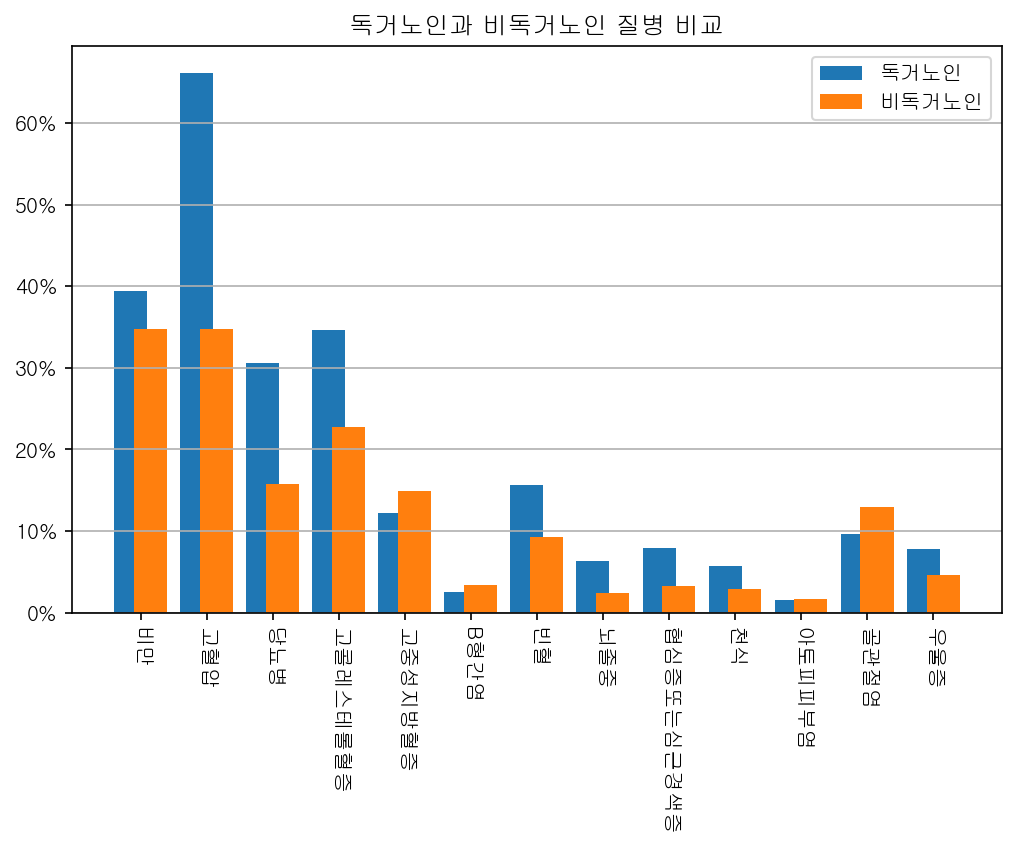

In [15]:
plt.figure(figsize=(8,5), dpi=150)
plt.bar(np.arange(13)-0.15, sum_every_elder_ratio.iloc[0,:].values ,width=0.5)
plt.bar(np.arange(13)+0.15, sum_al_ratio.values[0], width=0.5)
plt.xticks(np.arange(13), diseasename, rotation = 270)
plt.yticks(np.arange(0,sum_every_elder_ratio.iloc[0,:].values.max(),0.1), [ str(int(x*100))+"%" for x in (np.arange(0,sum_every_elder_ratio.iloc[0,:].values.max(),0.1))])
plt.title("독거노인과 비독거노인 질병 비교")
plt.legend(["독거노인","비독거노인"])
plt.grid(axis = "y")

plt.savefig("독거노인과 비독거노인 질병 비교.jpeg")

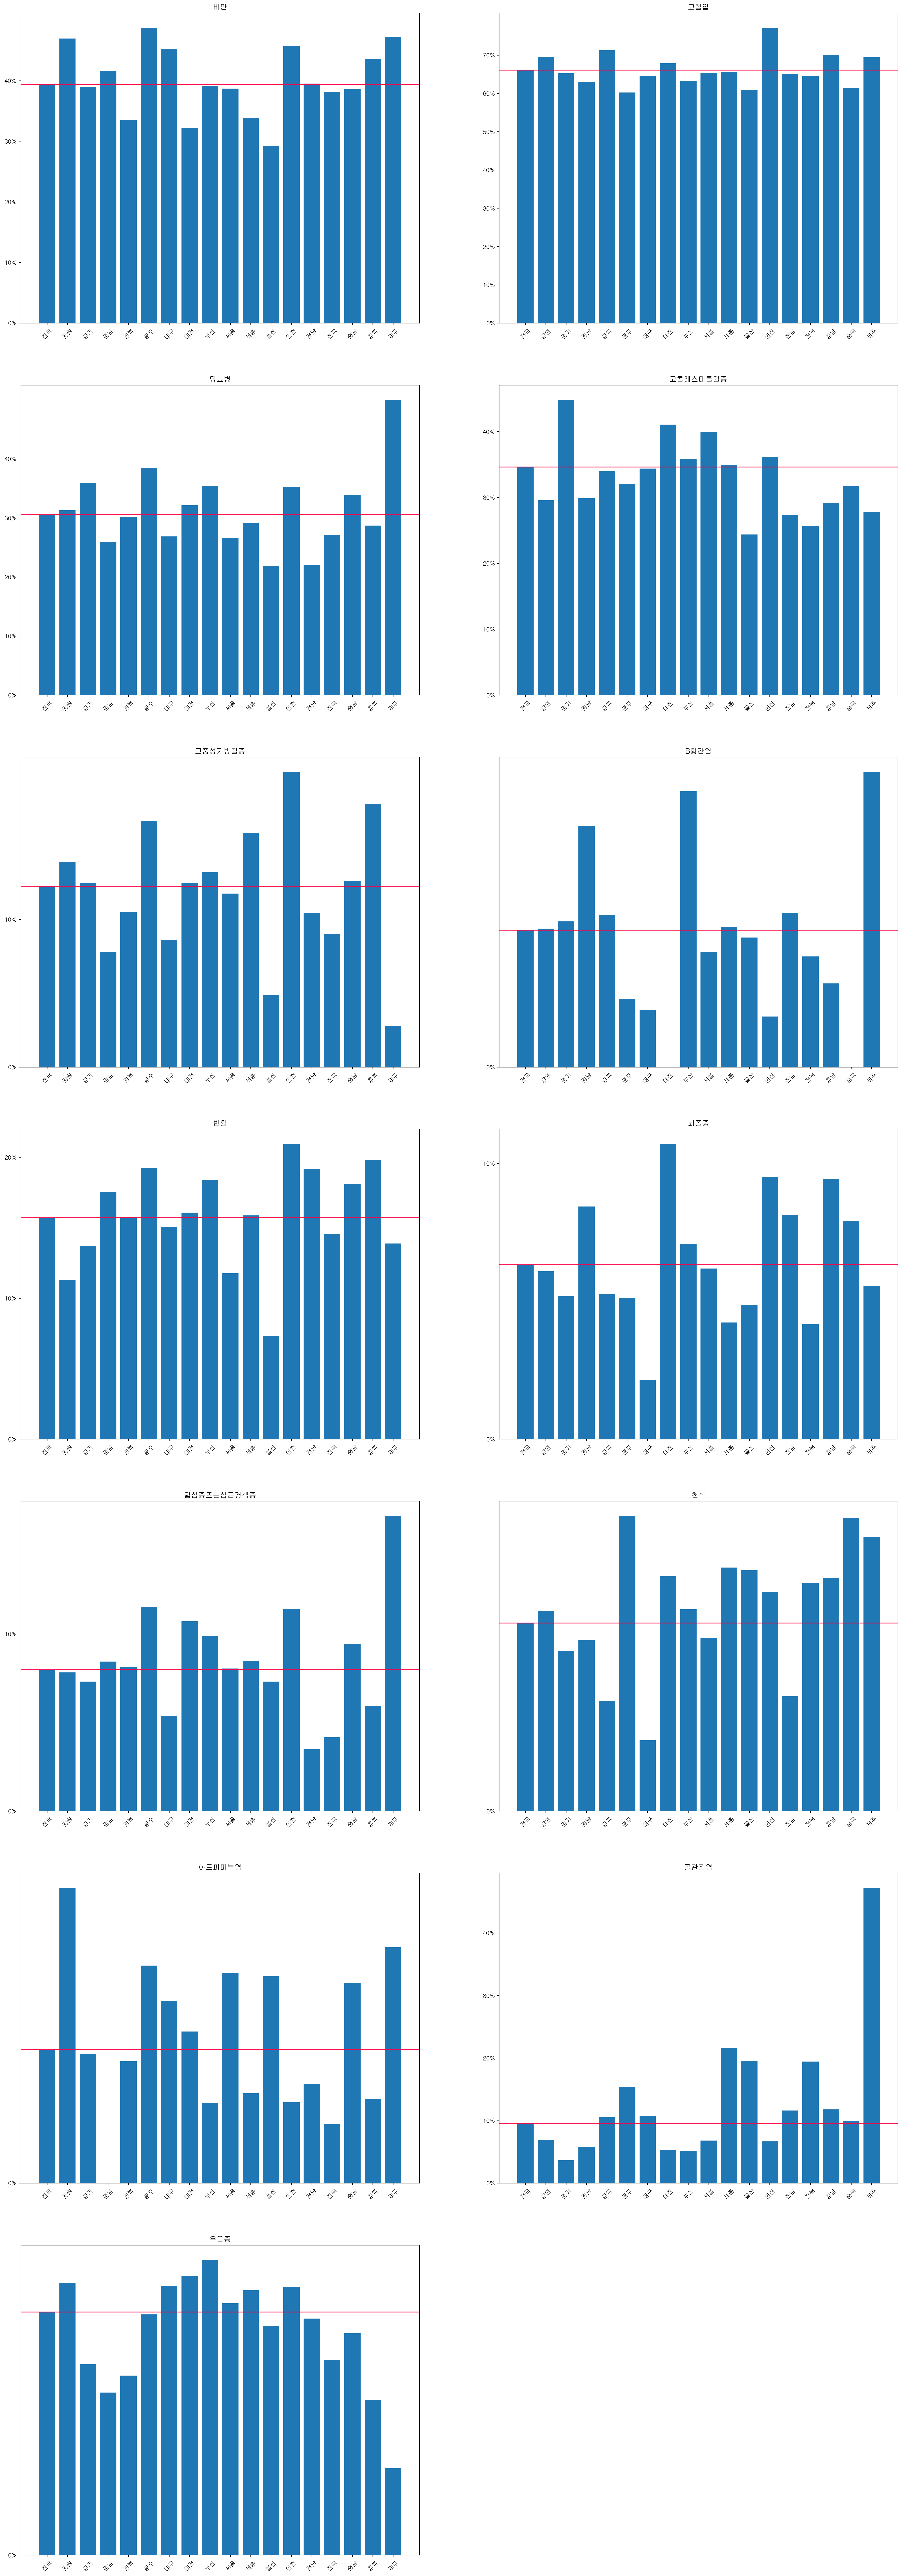

In [16]:
plt.figure(figsize=(26, 100), dpi=200)
for i, name in enumerate(diseasename):
    plt.subplot(9,2,i+1)
    plt.bar(df_sum.index, sum_every_elder_ratio[name])
    plt.title(diseasename[i])
    plt.xticks(rotation=45)
    plt.yticks(np.arange(0,sum_every_elder_ratio[name].max(),0.1), [ str(int(x*100))+"%" for x in (np.arange(0,sum_every_elder_ratio[name].max(),0.1))])
    plt.axhline(sum_every_elder_ratio[name][0], color='#FF0044', linewidth=1.5, alpha=0.9)

plt.savefig("지역별 전국평균과 비교.jpeg")

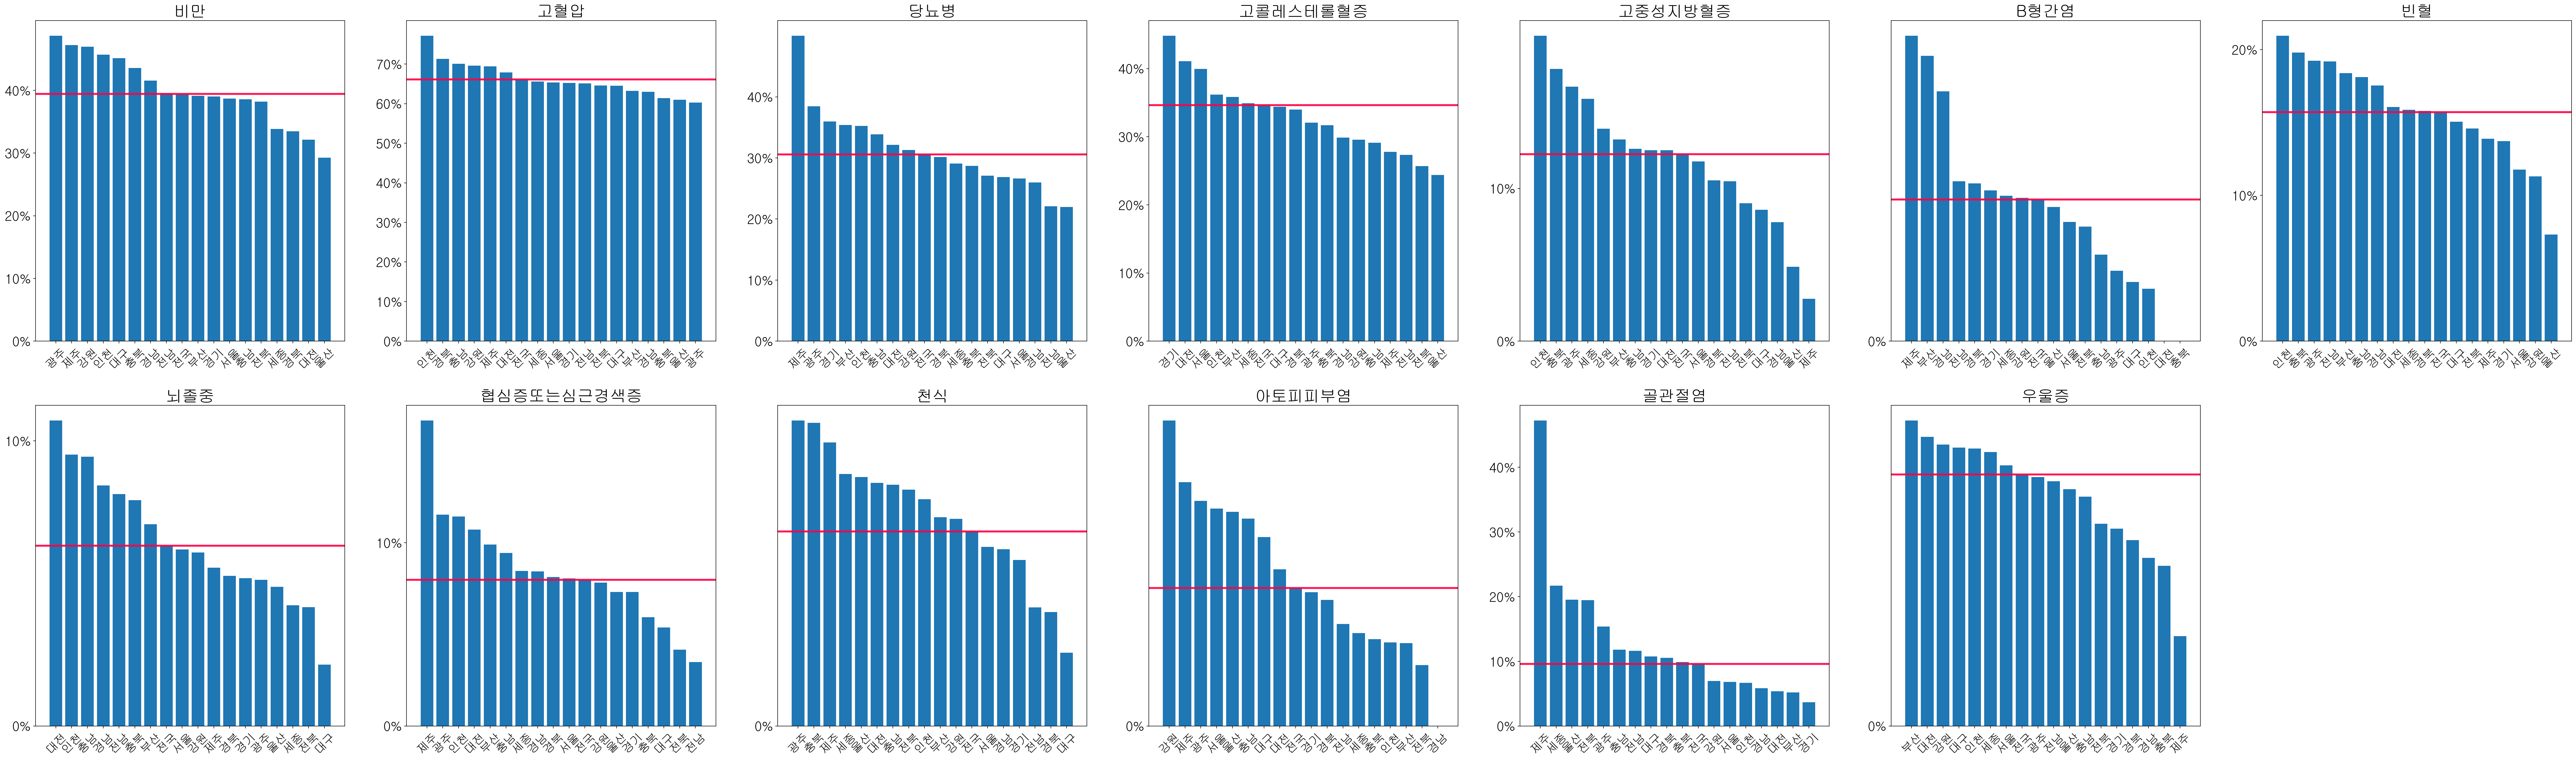

In [35]:
plt.figure(figsize=(70, 20), dpi=200)
for i, name in enumerate(diseasename):
    plt.subplot(2,7,i+1)
    plt.bar(sum_every_elder_ratio[name].sort_values(ascending=False).index.to_list(), 
            sum_every_elder_ratio[name].sort_values(ascending=False))
    plt.title(diseasename[i],fontsize=25)
    plt.xticks(rotation=45, fontsize=18)
    plt.yticks(np.arange(0,sum_every_elder_ratio[name].max(),0.1), 
               [ str(int(x*100))+"%" for x in (np.arange(0,sum_every_elder_ratio[name].max(),0.1))],
               fontsize=20)
    plt.axhline(sum_every_elder_ratio[name][0], color='#FF0044', linewidth=3, alpha=0.9)

plt.savefig("지역별 전국평균과 비교2.jpeg")

In [19]:
gap_all_ragion = []
for i in range(17):
    gap_all_ragion.append(sum_every_elder_ratio.iloc[0,:] - sum_every_elder_ratio.iloc[i+1,:])
gap_all_ragion = pd.DataFrame(gap_all_ragion)
gap_all_ragion.index = sum_every_elder_ratio.index[1:]
gap_all_ragion.head(10)

,비만,고혈압,당뇨병,고콜레스테롤혈증,고중성지방혈증,B형간염,빈혈,뇌졸중,협심증또는심근경색증,천식,아토피피부염,골관절염,우울증
강원,-0.075284,-0.034758,-0.007365,0.050703,-0.016698,-0.000312,0.044025,0.002360,0.001481,-0.003681,-0.019076,0.026287,-0.009228
경기,0.004037,0.008455,-0.054077,-0.101816,-0.002567,-0.001664,0.019873,0.011401,0.006572,0.008408,0.000463,0.059266,0.016753
경남,-0.021303,0.031024,0.045938,0.047654,0.044510,-0.019679,-0.018257,-0.021186,-0.004673,0.005241,0.015707,0.037410,0.025781
경북,0.059353,-0.052025,0.004243,0.006642,0.017169,-0.002933,-0.000827,0.010598,-0.001597,0.023696,0.001353,-0.009411,0.020312
광주,-0.092898,0.058330,-0.078937,0.025842,-0.044234,0.012955,-0.035240,0.011948,-0.035642,-0.032555,-0.009934,-0.057994,0.000805
대구,-0.057332,0.015733,0.036861,0.002269,0.036411,0.015023,0.006530,0.041725,0.025979,0.035684,-0.005799,-0.011675,-0.008293
대전,0.072853,-0.017677,-0.015750,-0.064359,-0.002567,0.025775,-0.003646,-0.043913,-0.027401,-0.014240,-0.002150,0.042280,-0.011557
부산,0.002772,0.028819,-0.048095,-0.012135,-0.009643,-0.026112,-0.026894,-0.007525,-0.019314,-0.004132,0.006273,0.043965,-0.016611
서울,0.007284,0.007643,0.039425,-0.053026,0.004785,0.004103,0.039421,0.001310,-0.000753,0.004557,-0.009061,0.027740,-0.002767
세종,0.055657,0.004809,0.014673,-0.002851,-0.036298,-0.000680,-0.001662,0.020902,-0.004914,-0.016885,0.005125,-0.121079,-0.006928


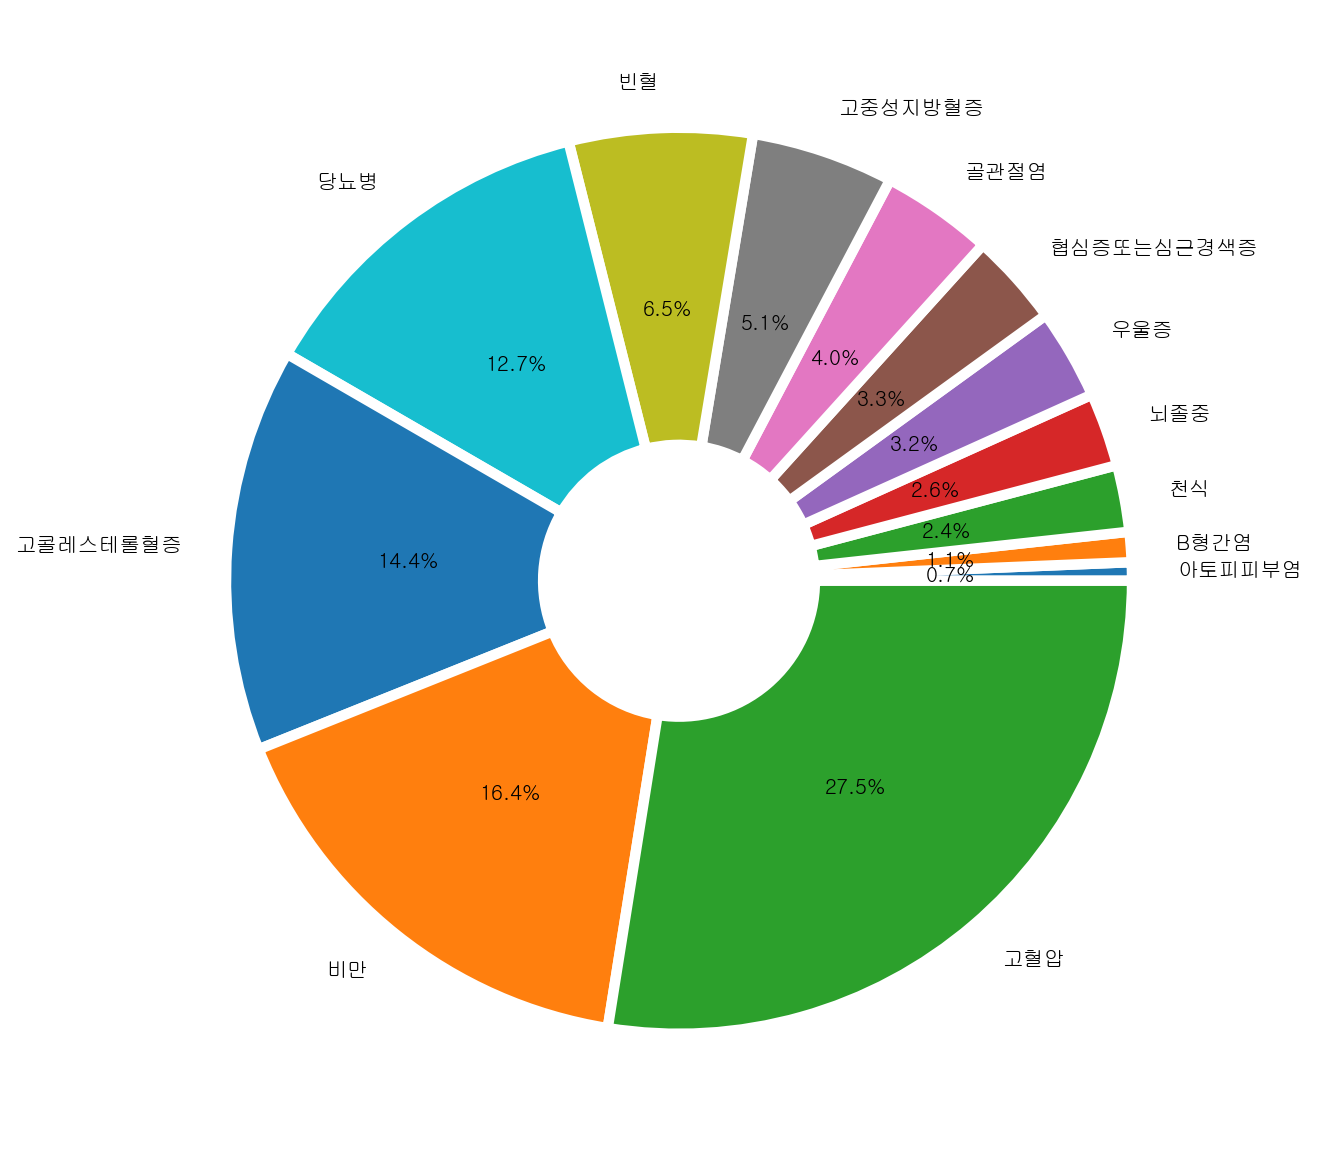

In [20]:
plt.figure(figsize=(10,10), dpi =150, facecolor="white")
X = df_sum.iloc[0,:].sort_values()
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(X, labels= X.index.to_list(),autopct='%.1f%%',  wedgeprops=wedgeprops)

plt.savefig("노인 질병 원그래프.jpeg")

In [21]:
df_sum.iloc[0,:].shape[0]

13

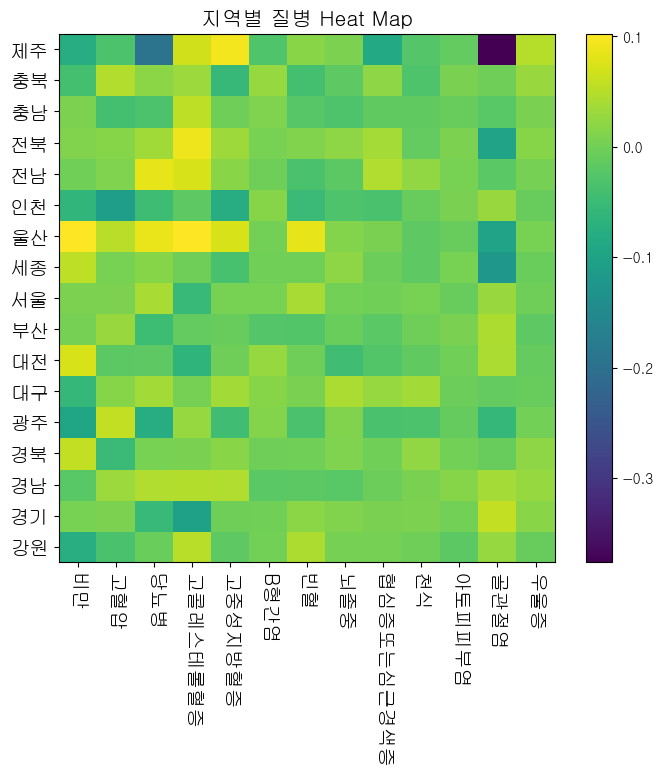

In [22]:
plt.figure(figsize=(8,7), dpi=100)
plt.pcolor(gap_all_ragion)
plt.yticks(np.arange(0.5 ,len(gap_all_ragion.index), 1),list(gap_all_ragion.index), fontsize=14)
plt.xticks(np.arange(0.5, len(gap_all_ragion.columns), 1),list(gap_all_ragion.columns), fontsize=14,rotation = 270)
plt.colorbar()
plt.title("지역별 질병 Heat Map", fontsize=15)

plt.savefig("지역별 질병 Heat Map.jpeg")

In [23]:
lst_pop[1:], (np.array(lst_pop[1:])/sum(np.array(lst_pop[1:])))*100

([115,
  328,
  154,
  209,
  78,
  93,
  56,
  212,
  323,
  189,
  41,
  105,
  172,
  144,
  127,
  101,
  36],
 array([ 4.63149416, 13.20982682,  6.20217479,  8.41723721,  3.14136126,
         3.74546919,  2.25533629,  8.5380588 , 13.00845751,  7.61175997,
         1.65122835,  4.22875554,  6.92710431,  5.79943617,  5.11478051,
         4.06766009,  1.44985904]))

In [24]:
lst_pop[1:], (np.array(lst_pop[1:])/sum(np.array(lst_pop[1:])))*100

([115,
  328,
  154,
  209,
  78,
  93,
  56,
  212,
  323,
  189,
  41,
  105,
  172,
  144,
  127,
  101,
  36],
 array([ 4.63149416, 13.20982682,  6.20217479,  8.41723721,  3.14136126,
         3.74546919,  2.25533629,  8.5380588 , 13.00845751,  7.61175997,
         1.65122835,  4.22875554,  6.92710431,  5.79943617,  5.11478051,
         4.06766009,  1.44985904]))

# 2. 영양소분석

In [25]:
def sumnudata(x):
    nu = []
    df_nu = x.iloc[:,92:109].sum(axis=0)
    # display(df_nu)
    # print(type(df_nu))
    return df_nu

In [26]:
nu_name = all_al_edler.iloc[:,92:109].columns.to_list()
nu_name

['N_INTK',
 'N_EN',
 'N_WATER',
 'N_PROT',
 'N_FAT',
 'N_CHO',
 'N_CA',
 'N_PHOS',
 'N_FE',
 'N_NA',
 'N_K',
 'N_CAROT',
 'N_RETIN',
 'N_B1',
 'N_B2',
 'N_NIAC',
 'N_VITC']

In [27]:
sum_al_elder=sumnudata(all_al_edler)
sum_강원_elder=sumnudata(data_강원)
sum_경기_elder=sumnudata(data_경기)
sum_경남_elder=sumnudata(data_경남)
sum_경북_elder=sumnudata(data_경북)
sum_광주_elder=sumnudata(data_광주)
sum_대구_elder=sumnudata(data_대구)
sum_대전_elder=sumnudata(data_대전)
sum_부산_elder=sumnudata(data_부산)
sum_서울_elder=sumnudata(data_서울)
sum_세종_elder=sumnudata(data_세종)
sum_울산_elder=sumnudata(data_울산)
sum_인천_elder=sumnudata(data_인천)
sum_전남_elder=sumnudata(data_전남)
sum_전북_elder=sumnudata(data_전북)
sum_충남_elder=sumnudata(data_충남)
sum_충북_elder=sumnudata(data_충북)
sum_제주_elder=sumnudata(data_제주)

df_sum=pd.concat([sum_al_elder,sum_강원_elder,sum_경기_elder,sum_경남_elder,sum_경북_elder,sum_광주_elder,
sum_대구_elder,sum_대전_elder,sum_부산_elder,sum_서울_elder,sum_세종_elder,sum_울산_elder,
sum_인천_elder,sum_전남_elder, sum_전북_elder, sum_충남_elder, sum_충북_elder,sum_제주_elder], axis = 1)
df_sum = df_sum.T
df_sum.index = ["전국", "강원", "경기", "경남", "경북", "광주", "대구", "대전", "부산", "서울", "세종", "울산",
                "인천", "전남", "전북", "충남", "충북", "제주"]

In [28]:
sum_every_elder = (df_sum.T/lst_pop).T
sum_every_elder.head()

,N_INTK,N_EN,N_WATER,N_PROT,N_FAT,N_CHO,N_CA,N_PHOS,N_FE,N_NA,N_K,N_CAROT,N_RETIN,N_B1,N_B2,N_NIAC,N_VITC
전국,1081.722563,1496.363173,707.746624,48.868865,24.116775,262.100186,402.350082,823.222043,10.427554,2749.693519,2314.287862,2573.917449,70.382109,1.059308,0.965057,9.651123,62.714005
강원,1034.782427,1520.297233,663.241178,49.211019,25.105871,268.792194,373.342853,802.364559,9.613266,2906.331032,2204.561096,1793.161995,58.346810,1.041209,0.908683,10.000409,53.386047
경기,1155.786476,1515.341405,778.441814,50.599140,27.116441,253.727799,432.206087,849.061871,9.847037,2779.025038,2375.274190,2550.059984,82.655446,1.008233,1.087116,9.491750,56.706496
경남,1091.650340,1485.135041,707.721077,48.759205,21.848791,265.850241,408.931784,822.951581,8.897574,2668.686655,2410.990261,2439.837629,79.305385,1.064268,0.955471,9.479662,57.427518
경북,1017.560987,1494.769702,638.703736,47.711886,21.991969,267.220298,396.717682,806.268524,10.363185,2593.130664,2249.338907,2635.815342,53.006895,1.039525,0.931162,9.067538,51.512159


In [29]:
sum_al = sumnudata(all_not_elder)
sum_al = sum_al/len(all_not_elder)
sum_al = pd.DataFrame(sum_al).T
sum_al.index = ["비고령"]
sum_al

,N_INTK,N_EN,N_WATER,N_PROT,N_FAT,N_CHO,N_CA,N_PHOS,N_FE,N_NA,N_K,N_CAROT,N_RETIN,N_B1,N_B2,N_NIAC,N_VITC
비고령,1525.327664,1911.944579,1049.017739,68.119195,40.317804,299.608133,502.789042,1078.780307,13.627615,3746.388167,2974.534384,3552.482526,118.560602,1.420473,1.399583,14.269481,88.460326


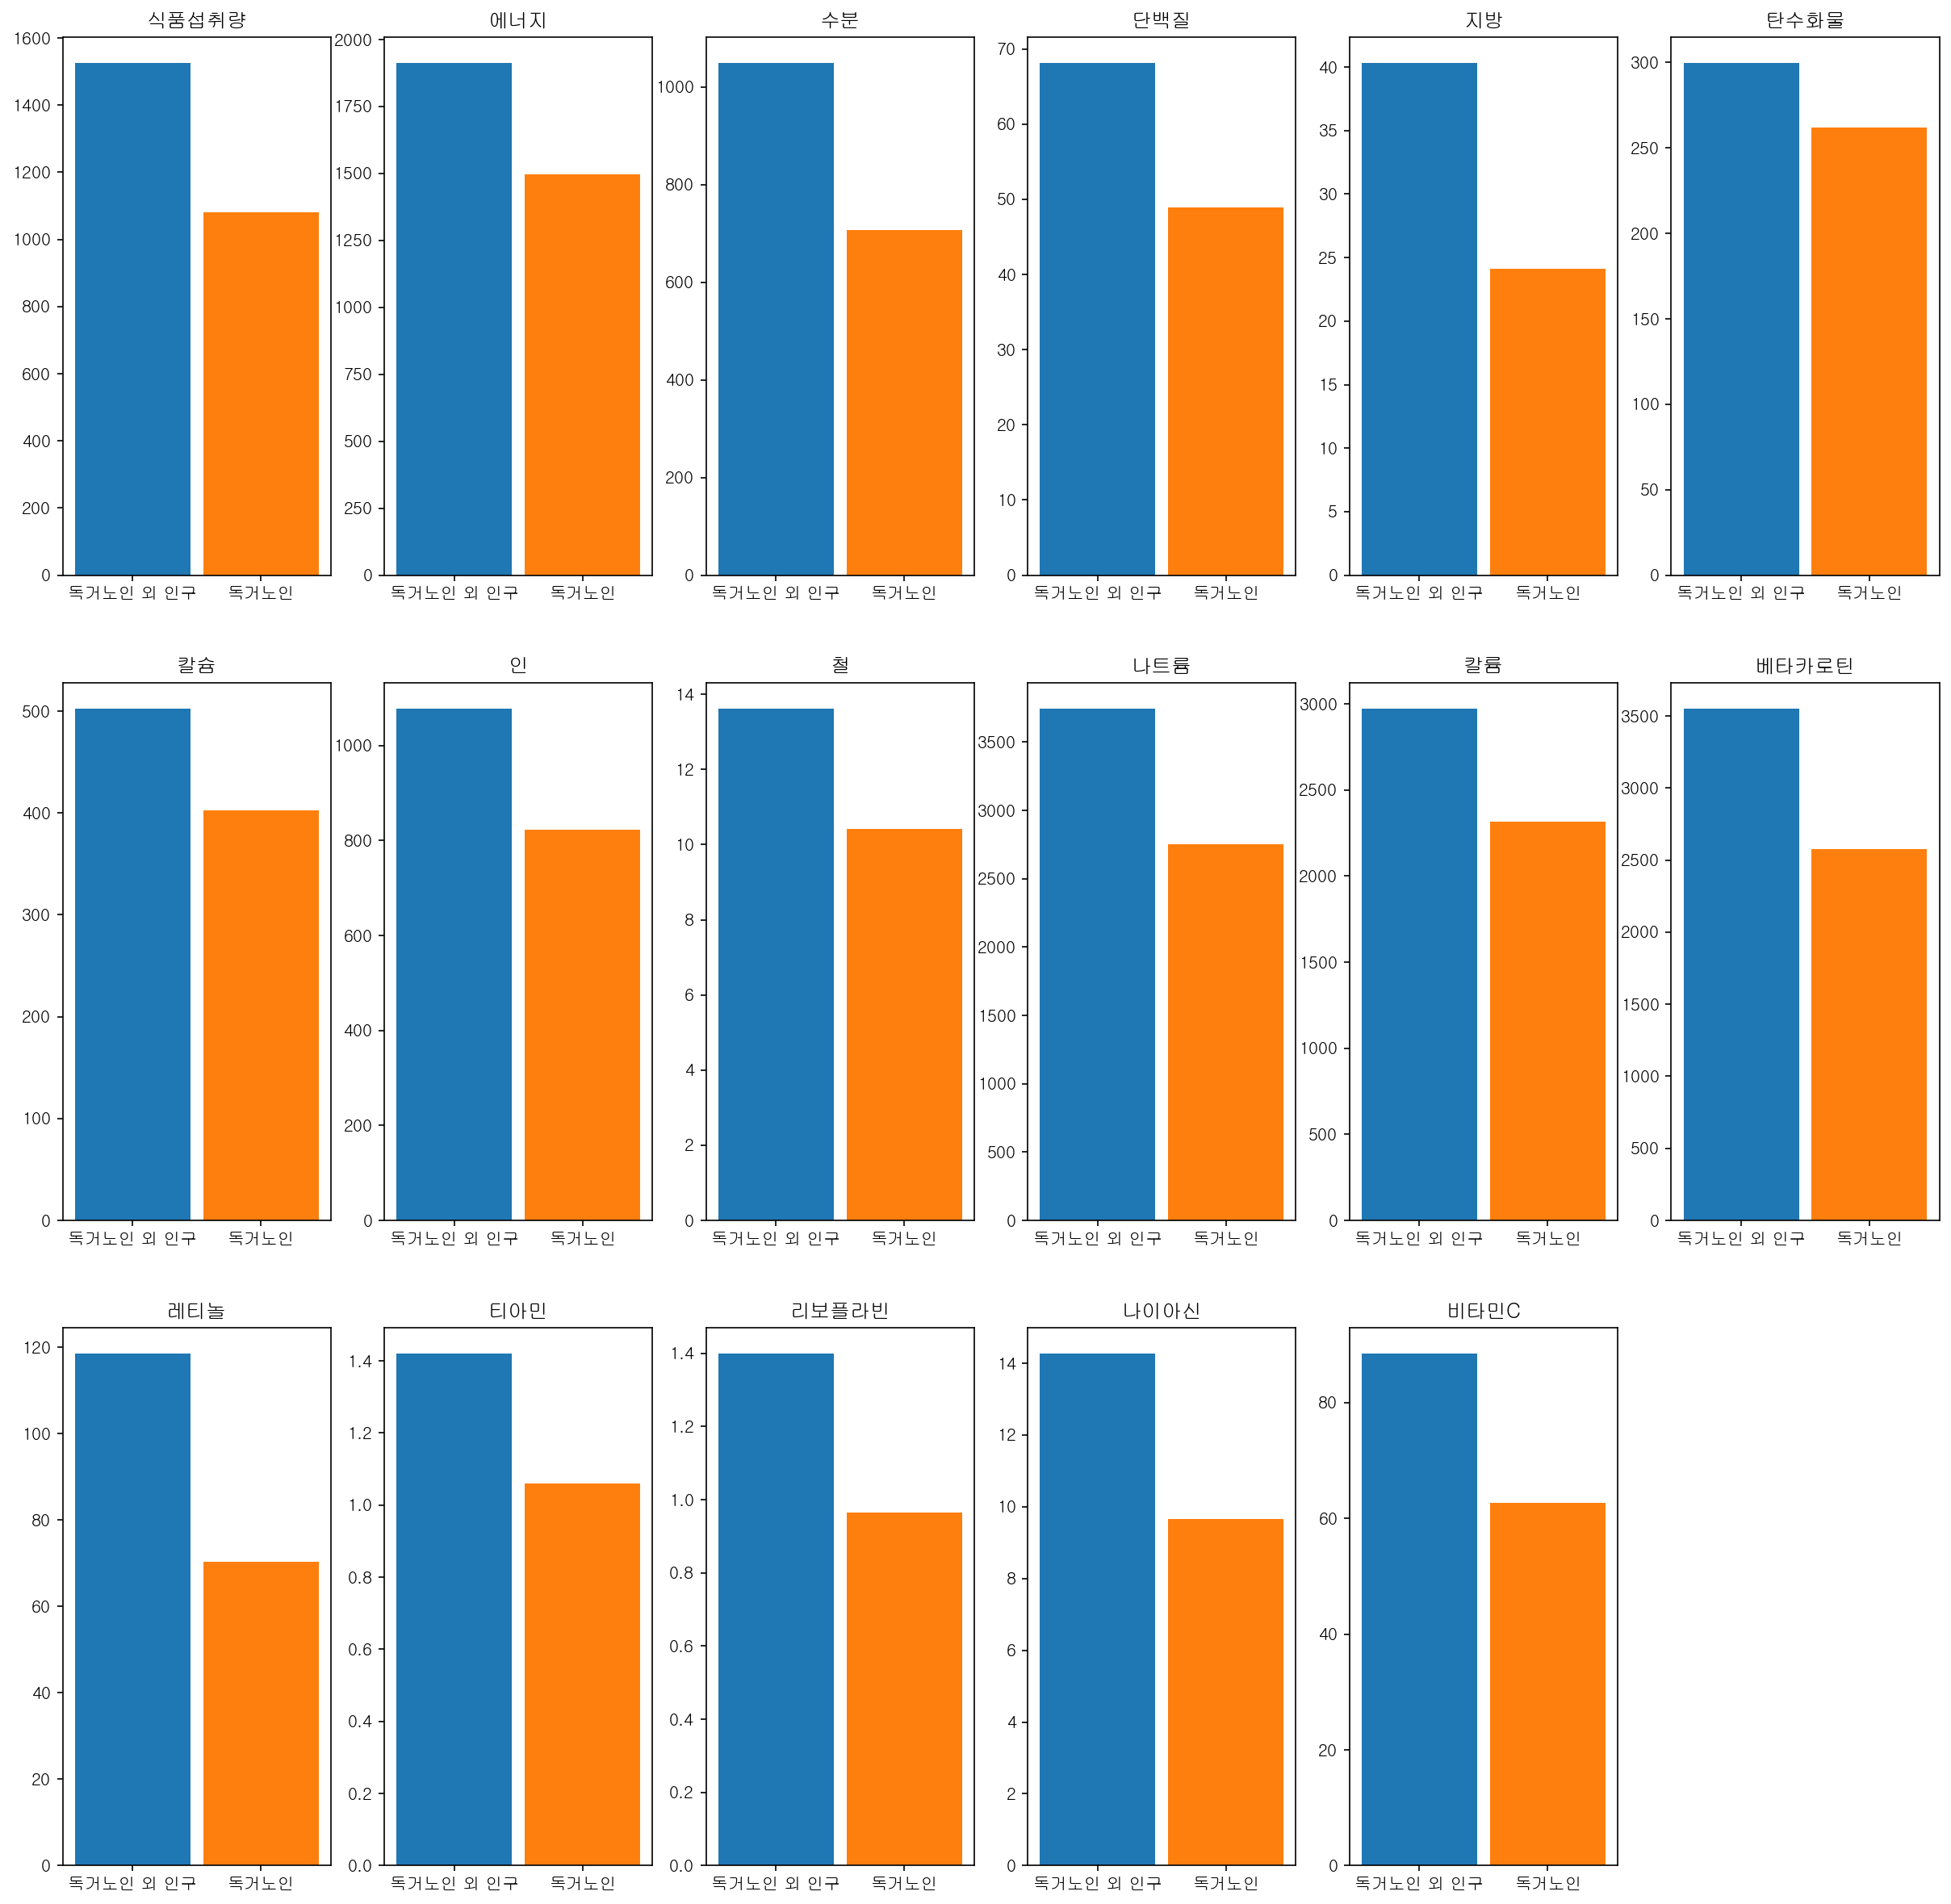

In [30]:
plt.figure(figsize=(20,20), dpi=150)
for i in range(17):
    plt.subplot(3,6,i+1)
    plt.bar([0],sum_al.iloc[0,i],width=0.45)
    plt.bar([0.5],sum_every_elder.iloc[0,i],width=0.45)
    plt.xticks([0, 0.5], ["독거노인 외 인구", "독거노인"])
    plt.title(meta["variable description"][92:109].values[i])
    
plt.savefig("독거노인 영양소 평균 비교.jpeg")
    

In [31]:
gap_nuall_ragion = []
for i in range(17):
    gap_nuall_ragion.append(sum_every_elder.iloc[0,:] - sum_every_elder.iloc[i+1,:])
gap_nuall_ragion = pd.DataFrame(gap_nuall_ragion)
gap_nuall_ragion.index = sum_every_elder.index[1:]
gap_nuall_ragion.head(10)

,N_INTK,N_EN,N_WATER,N_PROT,N_FAT,N_CHO,N_CA,N_PHOS,N_FE,N_NA,N_K,N_CAROT,N_RETIN,N_B1,N_B2,N_NIAC,N_VITC
강원,46.940136,-23.934060,44.505446,-0.342154,-0.989096,-6.692008,29.007229,20.857484,0.814288,-156.637513,109.726766,780.755454,12.035299,0.018099,0.056373,-0.349286,9.327959
경기,-74.063913,-18.978232,-70.695190,-1.730275,-2.999666,8.372387,-29.856006,-25.839828,0.580516,-29.331520,-60.986328,23.857465,-12.273337,0.051074,-0.122060,0.159373,6.007509
경남,-9.927777,11.228132,0.025547,0.109660,2.267984,-3.750055,-6.581702,0.270462,1.529979,81.006864,-96.702399,134.079820,-8.923277,-0.004960,0.009586,0.171461,5.286488
경북,64.161576,1.593471,69.042888,1.156980,2.124807,-5.120112,5.632400,16.953519,0.064369,156.562855,64.948955,-61.897893,17.375213,0.019783,0.033895,0.583585,11.201846
광주,-11.760745,138.261223,-33.738862,4.953679,3.734541,14.372844,-0.853952,14.151879,-1.167697,463.124178,-7.763600,69.358595,-5.300922,0.095999,0.141922,0.996873,-10.805769
대구,-82.574723,-16.509258,-56.228271,-1.776268,-0.903920,1.058515,-9.735476,-44.095342,-1.565201,-191.746625,-72.119892,136.867576,-16.145743,-0.046548,-0.070329,0.072724,2.206017
대전,-145.268305,-201.444817,-98.775634,-7.064056,-4.031243,-12.038927,-12.824703,-103.504616,-0.267085,-214.767699,-85.309056,121.479382,8.968321,-0.133314,-0.068956,-1.237727,9.044069
부산,-84.796099,-20.490227,-75.141840,-2.196677,-0.873835,0.478578,-39.459822,-40.387840,-0.136753,-92.760690,-151.964026,-258.672829,-18.064268,-0.047891,-0.124328,-0.617358,-11.102906
서울,-60.771621,-51.843512,-54.839780,-2.886957,-5.288503,-0.192538,-20.954185,-32.165823,-0.132977,59.269974,-134.546782,-414.524440,-18.977587,-0.050440,-0.113934,-0.338335,-11.731713
세종,15.124854,-57.456690,19.312789,-0.759321,0.533135,-18.483438,7.174710,-36.663561,-1.898867,-497.428875,-102.385494,-35.335325,20.197664,-0.221682,0.100908,-1.502041,-13.894756


In [32]:
meta["variable description"][92:109].values

array(['식품섭취량', '에너지', '수분', '단백질', '지방', '탄수화물', '칼슘', '인', '철', '나트륨',
       '칼륨', '베타카로틴', '레티놀', '티아민', '리보플라빈', '나이아신', '비타민C'], dtype=object)

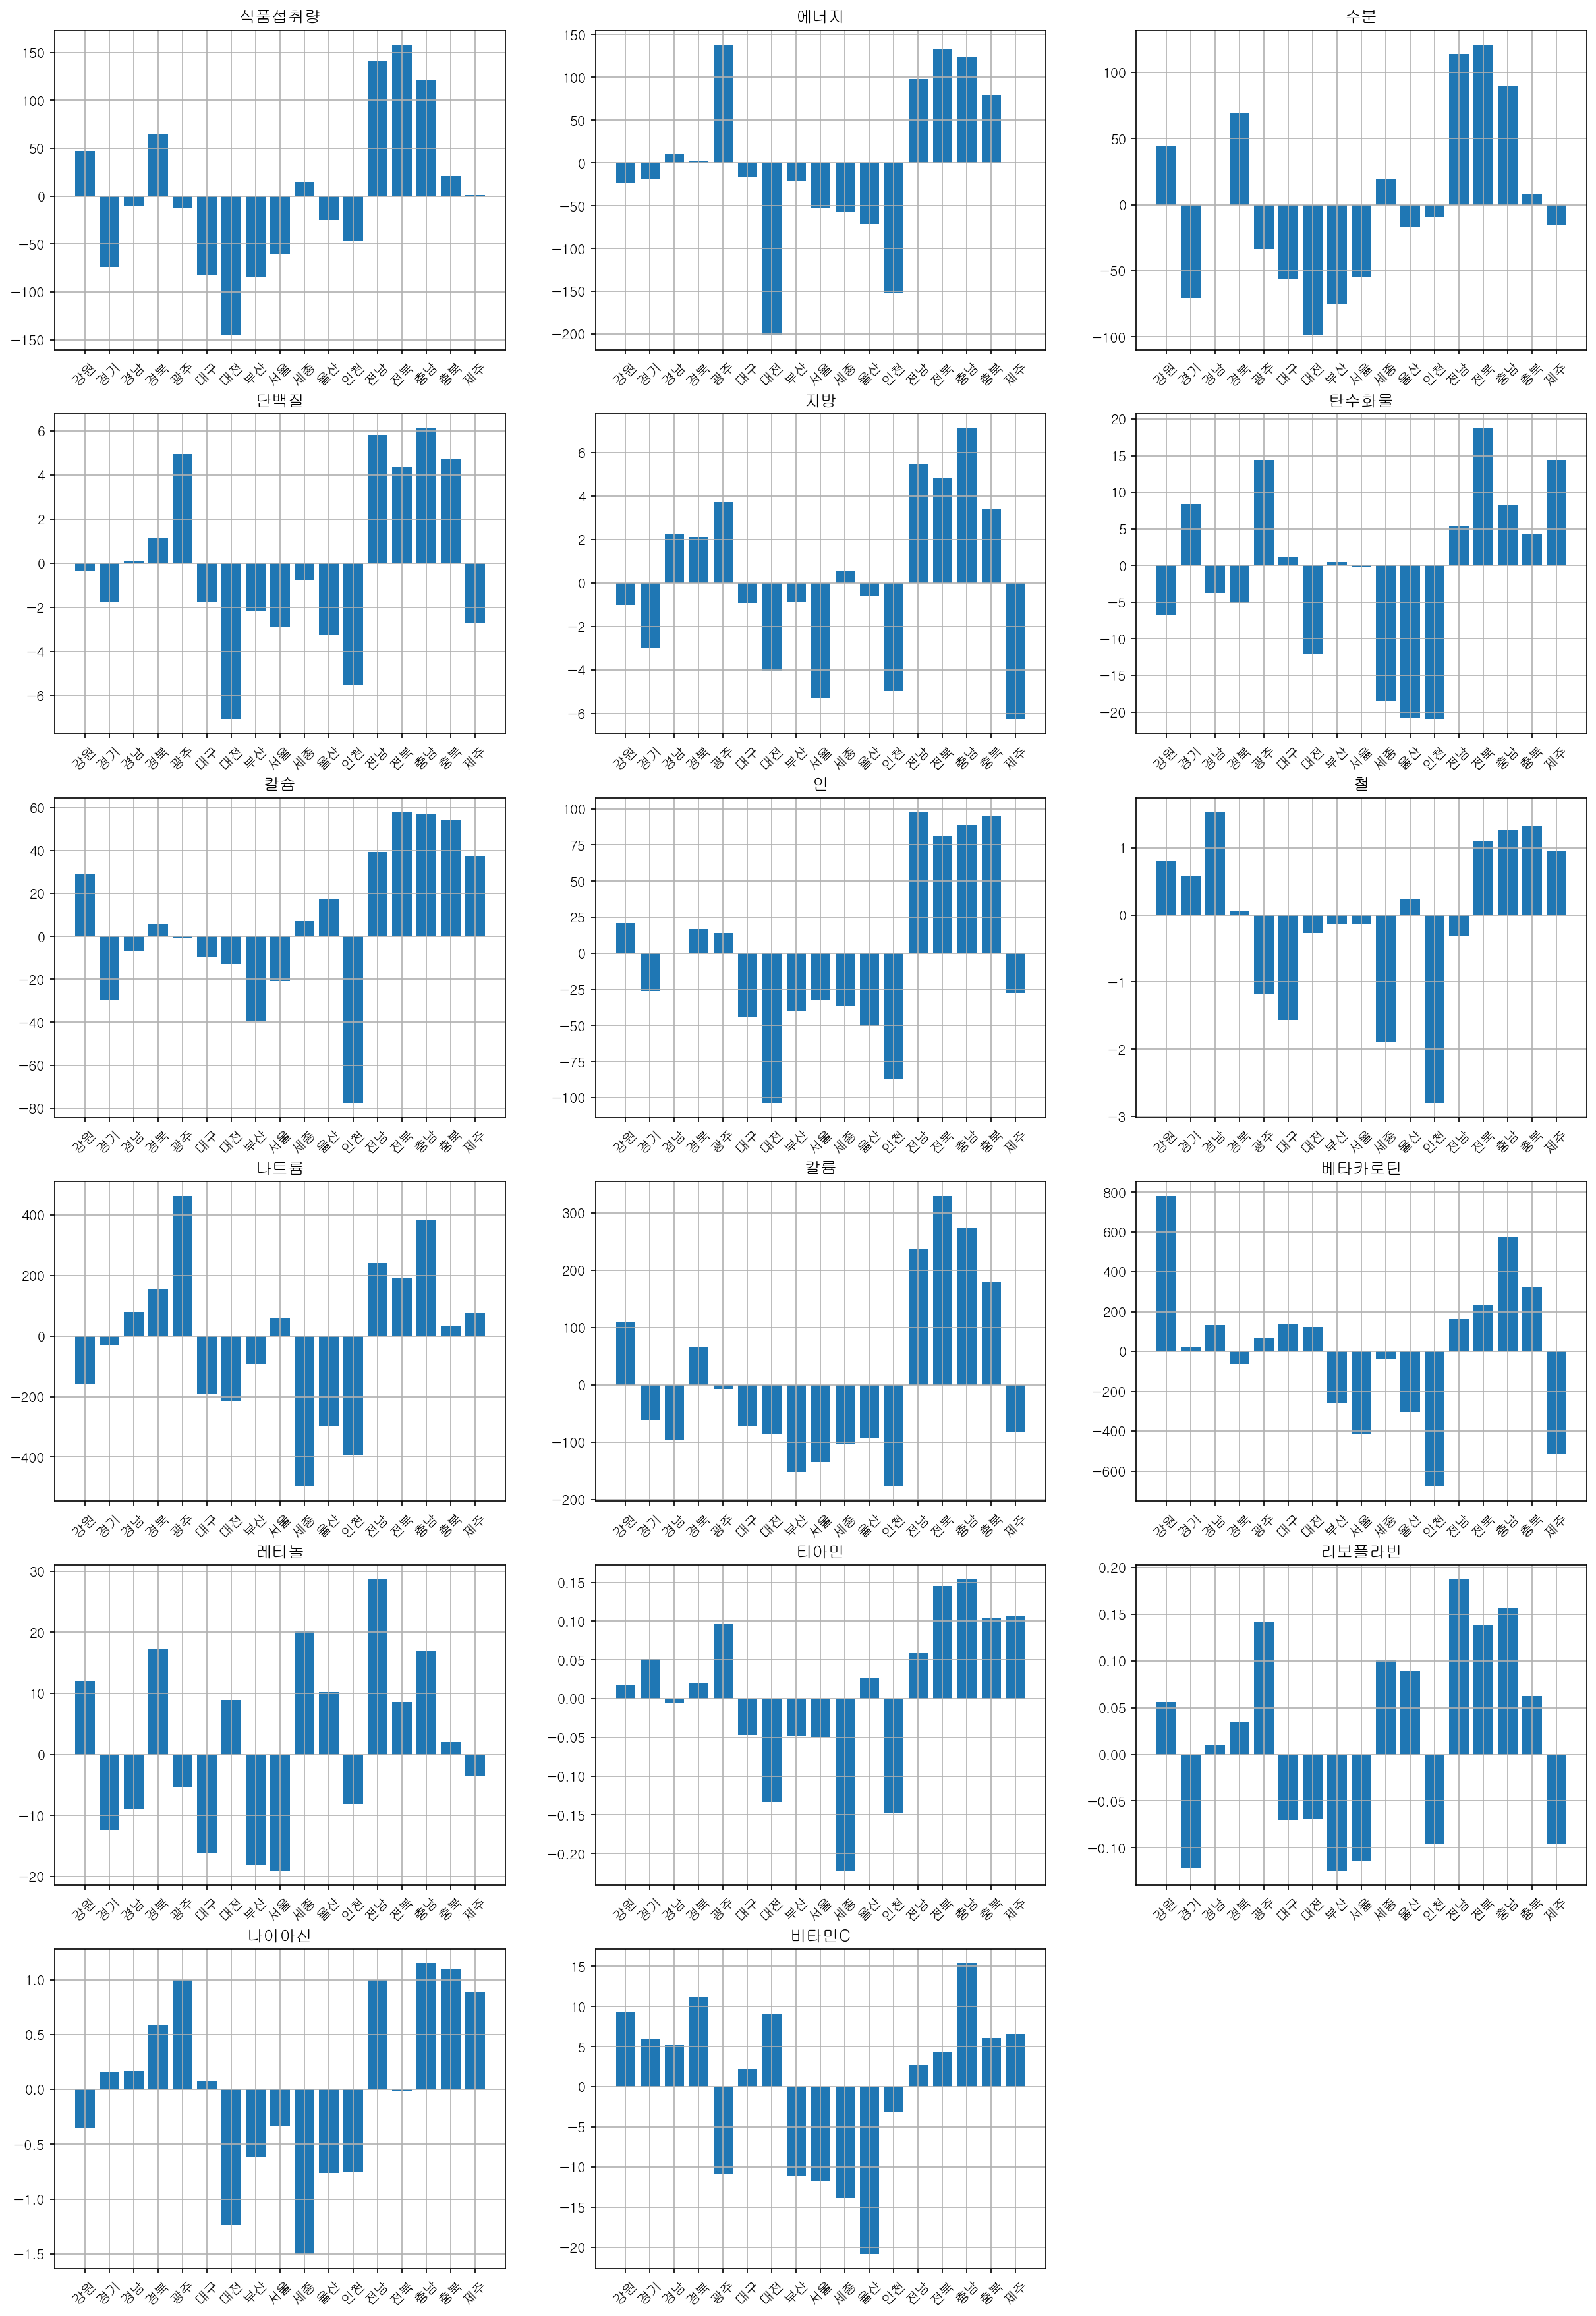

In [33]:
plt.figure(figsize=(20,30), dpi = 150)
for i, name in enumerate(nu_name):
    plt.subplot(6,3,i+1)
    plt.bar(gap_nuall_ragion.index.to_list(), gap_nuall_ragion[name])
    plt.xticks(rotation=45)
    plt.grid()
    plt.title(meta["variable description"][92:109].values[i])
    
plt.savefig("지역별 영양소 평균과 차이.jpeg")
    